<a href="https://colab.research.google.com/github/Dfgr109109/CV/blob/master/Capitulo_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Los archivos que acompañan MEP incluyen conjuntos de entrenamiento para varios ejemplos, tome uno de los ejemplos y utilice los datos para realizar la misma tarea por RNAs.

In [1]:
# Paso 1: Importar librerías
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Paso 2: Cargar el dataset Iris
iris = load_iris()
X = iris.data  # características: largo/ancho pétalo y sépalo
y = iris.target  # clases: 0, 1, 2

# Paso 3: Preprocesamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertimos las etiquetas a one-hot encoding
y_encoded = to_categorical(y)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Paso 4: Definir la red neuronal
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')  # 3 clases
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)

# Paso 5: Evaluación del modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Precisión en el conjunto de prueba: {accuracy:.4f}")

# Paso 6: Predicción con una muestra
sample = X_test[0].reshape(1, -1)
prediction = model.predict(sample)
predicted_class = np.argmax(prediction)
print(f"\n🌸 Clase predicha para una muestra: {iris.target_names[predicted_class]}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - accuracy: 0.2826 - loss: 1.3642 - val_accuracy: 0.1250 - val_loss: 1.3930
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3099 - loss: 1.3095 - val_accuracy: 0.1250 - val_loss: 1.3718
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2943 - loss: 1.2908 - val_accuracy: 0.1250 - val_loss: 1.3505
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.2669 - loss: 1.2724 - val_accuracy: 0.1250 - val_loss: 1.3300
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2982 - loss: 1.2552 - val_accuracy: 0.1667 - val_loss: 1.3099
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2826 - loss: 1.2444 - val_accuracy: 0.1667 - val_loss: 1.2906
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2982 - loss: 1.1923 - val_accuracy: 0.1667 - val_loss: 1.2720
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3138 - loss: 1.1828 - val_accuracy: 0.2083 - val_loss: 1.2547

2. Con base en la librería tensorflow, descargue el data set fashion MNIST. Haga una clasificación de prendas de vestir.

In [2]:
# Paso 1: Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Paso 2: Cargar el dataset Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalizar las imágenes (de 0-255 a 0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Paso 3: Definir la red neuronal
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),     # Aplana la imagen
    layers.Dense(128, activation='relu'),     # Capa oculta con 128 neuronas
    layers.Dense(64, activation='relu'),      # Otra capa oculta
    layers.Dense(10, activation='softmax')    # Capa de salida (10 clases)
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Paso 4: Entrenar el modelo
model.fit(X_train, y_train, epochs=10, validation_split=0.1)

# Paso 5: Evaluación del modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n✅ Precisión en el conjunto de prueba: {test_acc:.4f}")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7708 - loss: 0.6500 - val_accuracy: 0.8542 - val_loss: 0.3987
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8645 - loss: 0.3787 - val_accuracy: 0.8705 - val_loss: 0.3589
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8788 - loss: 0.3348 - val_accuracy: 0.8647 - val_loss: 0.3738
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8867 - loss: 0.3087 - val_accuracy: 0.8795 - val_loss: 0.3367
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8901 - loss: 0.2968 - val_accuracy: 0.8742 - val_loss: 0.3571
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8951 - loss: 0.2795 - val_accuracy: 0.8820 - val_loss: 0.3354
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8985 - loss: 0.2678 - val_accuracy: 0.8788 - val_loss: 0.3458
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9026 - loss: 0.2567 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


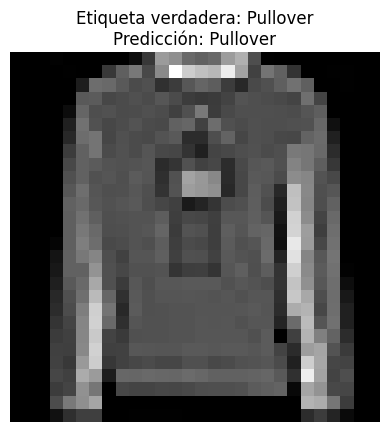

In [3]:
# Mostrar una imagen y la predicción
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Elegimos una imagen al azar del conjunto de prueba
index = np.random.randint(0, len(X_test))
img = X_test[index]
true_label = y_test[index]

# Hacer predicción
prediction = model.predict(img.reshape(1, 28, 28))
predicted_label = np.argmax(prediction)

# Mostrar imagen y resultado
plt.imshow(img, cmap='gray')
plt.title(f"Etiqueta verdadera: {class_names[true_label]}\nPredicción: {class_names[predicted_label]}")
plt.axis('off')
plt.show()

3. Consiga un data set de cualquier tipo, estudie sus características (features) y su rótulo. Diseñe una red neuronal y haga ejemplos con base en los pesos aprendidos.

In [4]:
# Paso 1: Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Paso 2: Cargar el dataset desde internet (vino tinto)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(url, sep=';')

# Mostrar primeras filas
print("Primeras filas del dataset:")
print(data.head())

# Paso 3: Separar features (X) y etiqueta (y)
X = data.drop('quality', axis=1).values
y = data['quality'].values

# Paso 4: Normalizar y dividir en entrenamiento/prueba
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Paso 5: Crear la red neuronal (regresión)
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Salida continua (regresión)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Paso 6: Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)

# Paso 7: Evaluación del modelo
loss, mae = model.evaluate(X_test, y_test)
print(f"\n✅ Error medio absoluto en el conjunto de prueba: {mae:.4f}")

# Paso 8: Predicción con una muestra
sample = X_test[0].reshape(1, -1)
predicted_quality = model.predict(sample)[0][0]
print(f"\n🍷 Calidad predicha para una muestra: {predicted_quality:.2f} (real: {y_test[0]})")


Primeras filas del dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8    

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 32.8363 - mae: 5.6495 - val_loss: 20.7915 - val_mae: 4.4547
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.8051 - mae: 4.0420 - val_loss: 6.9363 - val_mae: 2.3979
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.7407 - mae: 2.0775 - val_loss: 2.6078 - val_mae: 1.2409
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6901 - mae: 1.2858 - val_loss: 2.0797 - val_mae: 1.1128
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9225 - mae: 1.0906 - val_loss: 1.8762 - val_mae: 1.0688
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7729 - mae: 1.0516 - val_loss: 1.7479 - val_mae: 1.0397
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.6306 - mae: 0.9897 - val_loss: 1.6396 - val_mae: 1.0144
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4447 - mae: 0.9408 - val_loss: 1.5362 - val_mae: 0.9813
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4657 - m

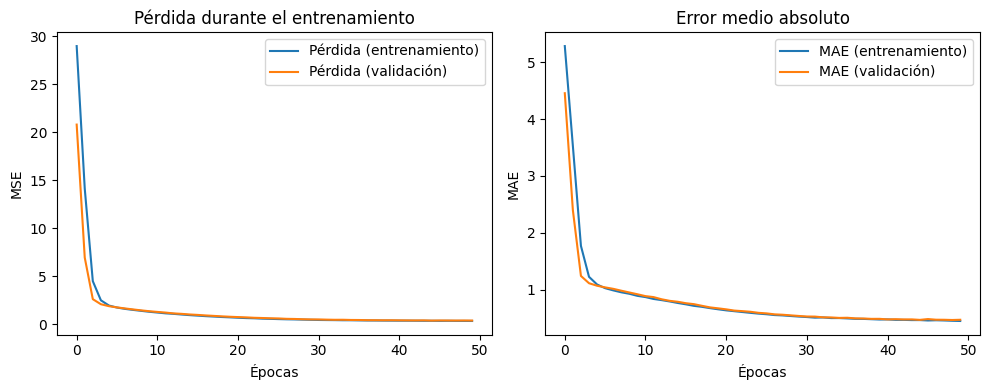

In [5]:
# Gráfica del historial de entrenamiento
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida (entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (validación)')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.title('Pérdida durante el entrenamiento')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE (entrenamiento)')
plt.plot(history.history['val_mae'], label='MAE (validación)')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.title('Error medio absoluto')
plt.legend()

plt.tight_layout()
plt.show()
